<a href="https://colab.research.google.com/github/Divyaanshvats/FIDROX_ASSIGNMENTS/blob/main/FIDROX_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AccessAI: Detecting Anomalous Swipe Behavior in Physical Access Control Systems**

# **IMPORT ALL THE REQUIRE LIBRARIES**

In [19]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import os
# Seed for reproducibility
np.random.seed(42)
random.seed(42)
NUM_DAYS = 30
SWIPES_PER_DAY = 1000
TOTAL_RECORDS = NUM_DAYS * SWIPES_PER_DAY
user_ids = [f"U{str(i).zfill(3)}" for i in range(1, 101)]
doors = {
    "D01": "Main Entrance",
    "D02": "East Wing",
    "D03": "Server Room",# restricted
    "D04": "HR Department",
    "D05": "Rooftop Access",# rarely used
    "D06": "Finance Room",
    "D07": "Cafeteria",
    "D08": "Basement Storage",# rarely used
}

# RANDOM GENERATION OF DATASET

In [20]:
data = []
start_date = datetime(2025, 5, 1)
for i in range(TOTAL_RECORDS):
    current_date = start_date + timedelta(days=i // SWIPES_PER_DAY)
    if np.random.rand() < 0.8:
        hour = np.random.randint(8, 19)  #Office hours
    else:
        hour = np.random.choice([0, 1, 2, 3, 4, 22, 23])  # Odd hours

    minute = np.random.randint(0, 60)
    second = np.random.randint(0, 60)
    timestamp = current_date.replace(hour=hour, minute=minute, second=second)
    user = random.choice(user_ids)
    door = random.choices(list(doors.keys()), weights=[25, 20, 5, 15, 2, 10, 20, 3])[0]
    direction = random.choice(["IN", "OUT"])
    result = "Success" if np.random.rand() > 0.05 else "Failed"
    # Anomalies are defined in the following way:
    if np.random.rand() < 0.01:
        for _ in range(5):
            anomaly_timestamp = timestamp + timedelta(seconds=random.randint(1, 30))
            data.append([anomaly_timestamp, user, door, doors[door], direction, "Failed"])

    data.append([timestamp, user, door, doors[door], direction, result])
df = pd.DataFrame(data, columns=["Timestamp", "UserID", "DoorID", "DoorName", "Direction", "Result"])
df.head()

,Timestamp,UserID,DoorID,DoorName,Direction,Result
0,2025-05-01 18:07:20,U082,D01,Main Entrance,OUT,Success
1,2025-05-01 15:52:35,U032,D01,Main Entrance,IN,Success
2,2025-05-01 15:43:29,U087,D06,Finance Room,IN,Success
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed
4,2025-05-01 10:43:54,U012,D01,Main Entrance,IN,Success


In [21]:
output_path = "/mnt/data/AccessAI_Simulated_Swipe_Logs.csv"
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df.to_csv(output_path, index=False)
output_path

'/mnt/data/AccessAI_Simulated_Swipe_Logs.csv'

# **DATA ANALYSIS(Basic Analysis)**

In [22]:
df = pd.read_csv("/mnt/data/AccessAI_Simulated_Swipe_Logs.csv")
df.head(6)

,Timestamp,UserID,DoorID,DoorName,Direction,Result
0,2025-05-01 18:07:20,U082,D01,Main Entrance,OUT,Success
1,2025-05-01 15:52:35,U032,D01,Main Entrance,IN,Success
2,2025-05-01 15:43:29,U087,D06,Finance Room,IN,Success
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed
4,2025-05-01 10:43:54,U012,D01,Main Entrance,IN,Success
5,2025-05-01 23:20:08,U072,D01,Main Entrance,OUT,Success


In [23]:
len(df)#length of dataset

31505

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31505 entries, 0 to 31504
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  31505 non-null  object
 1   UserID     31505 non-null  object
 2   DoorID     31505 non-null  object
 3   DoorName   31505 non-null  object
 4   Direction  31505 non-null  object
 5   Result     31505 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [25]:
df.isnull().sum()

,0
Timestamp,0
UserID,0
DoorID,0
DoorName,0
Direction,0
Result,0


In [26]:
df['UserID'].value_counts().head()

,count
UserID,
U089,411
U017,373
U001,359
U054,352
U018,348


In [27]:
df['DoorName'].value_counts()

,count
DoorName,
Main Entrance,7837
Cafeteria,6296
East Wing,6286
HR Department,4778
Finance Room,3200
Server Room,1567
Basement Storage,896
Rooftop Access,645


In [28]:
df['Direction'].value_counts()

,count
Direction,
IN,15786
OUT,15719


In [29]:
df['Result'].value_counts()

,count
Result,
Success,28478
Failed,3027


# **Time-based Analysis of the Dataset (Visualization also done)**

In [30]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

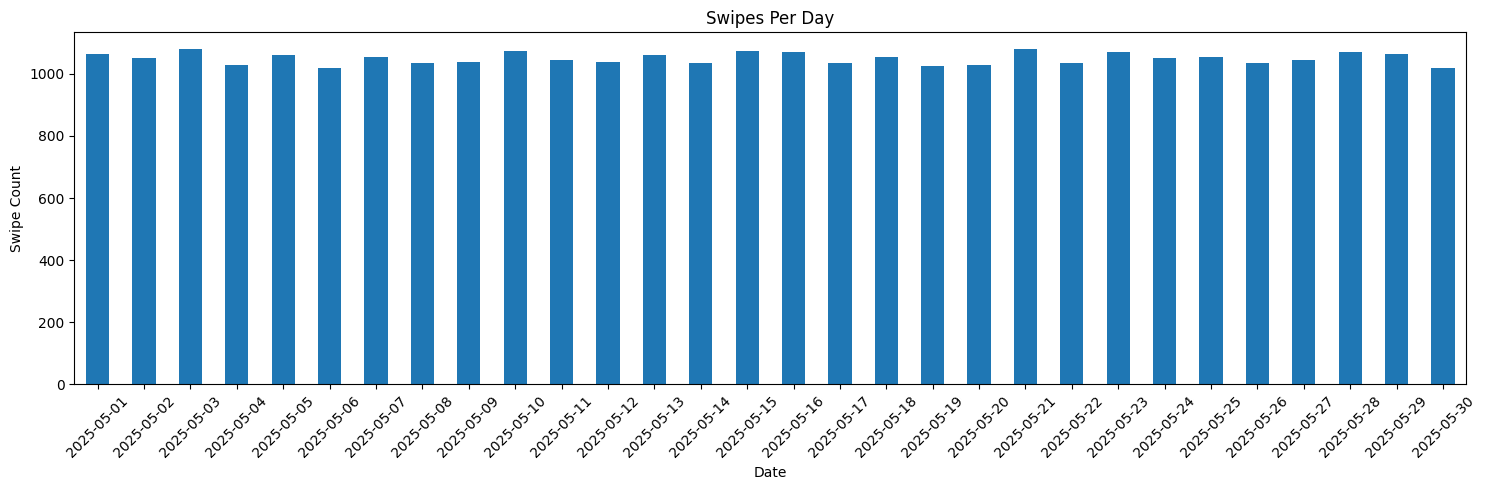

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
df['Date'].value_counts().sort_index().plot(kind='bar')
plt.title("Swipes Per Day")
plt.xlabel("Date")
plt.ylabel("Swipe Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-892732369>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


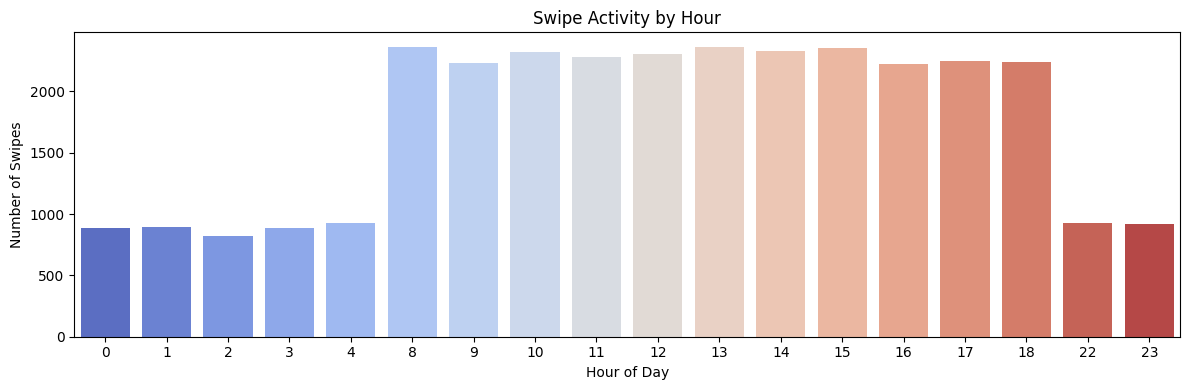

In [32]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title("Swipe Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Swipes")
plt.tight_layout()
plt.show()

# **Access Failures & Anomalies**

In [33]:
failure_rate = df['Result'].value_counts(normalize=True)['Failed']
failures_by_door = df[df['Result'] == 'Failed']['DoorName'].value_counts()
failures_by_hour = df[df['Result'] == 'Failed']['Hour'].value_counts().sort_index()

In [34]:
failure_rate

np.float64(0.09607998730360261)

In [35]:
failures_by_door

,count
DoorName,
Main Entrance,755
East Wing,650
Cafeteria,601
HR Department,459
Finance Room,316
Server Room,126
Basement Storage,75
Rooftop Access,45


In [36]:
failures_by_hour

,count
Hour,
0,78
1,95
2,75
3,65
4,86
8,243
9,193
10,241
11,213


# **User Activity Patterns**

<Axes: title={'center': 'Top 10 Active Users'}, ylabel='UserID'>

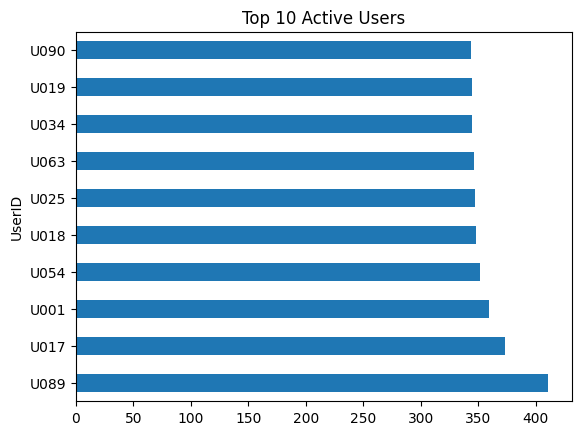

In [37]:
df['UserID'].value_counts().head(10).plot(kind='barh', title='Top 10 Active Users')

In [38]:
df[df['Result'] == 'Failed']['UserID'].value_counts().head(10)

,count
UserID,
U089,68
U094,53
U017,52
U036,50
U037,49
U047,49
U071,46
U025,45
U072,44


<ipython-input-39-4079921321>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Result', palette='Set2')


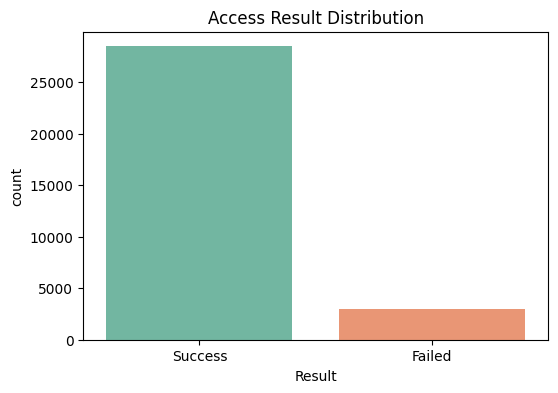

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Result', palette='Set2')
plt.title("Access Result Distribution")
plt.show()

<ipython-input-40-3623041406>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failures_by_door.index, y=failures_by_door.values, palette='mako')


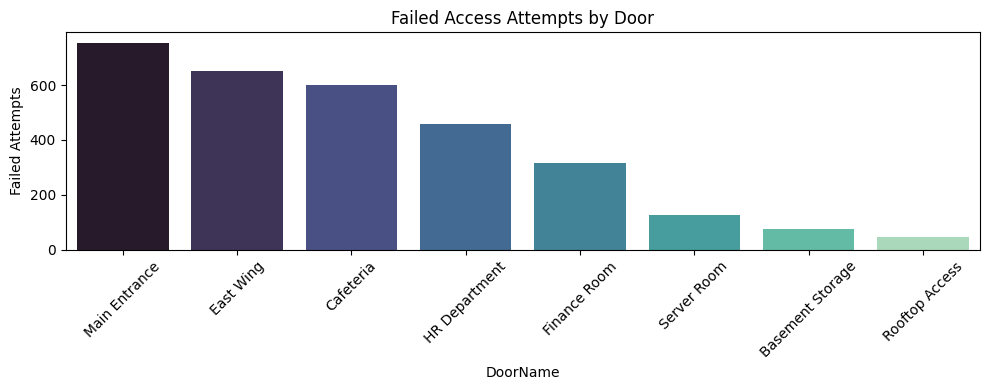

In [40]:
plt.figure(figsize=(10, 4))
failures_by_door = df[df['Result'] == 'Failed']['DoorName'].value_counts()
sns.barplot(x=failures_by_door.index, y=failures_by_door.values, palette='mako')
plt.title("Failed Access Attempts by Door")
plt.ylabel("Failed Attempts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-41-4184510998>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')


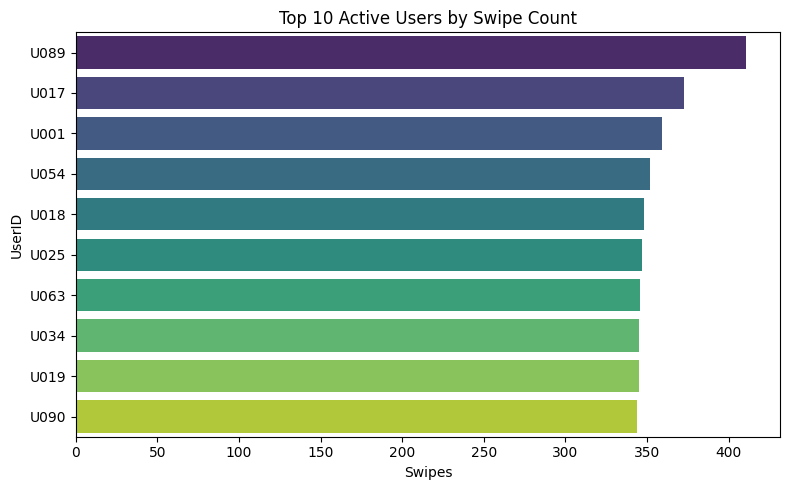

In [41]:
plt.figure(figsize=(8, 5))
top_users = df['UserID'].value_counts().head(10)
sns.barplot(y=top_users.index, x=top_users.values, palette='viridis')
plt.title("Top 10 Active Users by Swipe Count")
plt.xlabel("Swipes")
plt.ylabel("UserID")
plt.tight_layout()
plt.show()

# **PRE PROCESSING AND FEATURE ENGINEERING**

In [42]:
df['DirectionCode'] = df['Direction'].map({'IN': 0, 'OUT': 1})
df['ResultCode'] = df['Result'].map({'Success': 0, 'Failed': 1})
df['DoorCode'] = df['DoorID'].astype('category').cat.codes
df['UserCode'] = df['UserID'].astype('category').cat.codes
features = df[['Hour', 'DirectionCode', 'ResultCode', 'DoorCode', 'UserCode']]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# **NOW WE APPLY DBSCAN TECHNIQUE**

In [44]:
restricted_doors = ['D03', 'D05', 'D08']
rare_restricted_anomalies = df[df['DoorID'].isin(restricted_doors)]
print(f"Anomalies for rarely used or restricted doors: {len(rare_restricted_anomalies)}")

Anomalies for rarely used or restricted doors: 3108


In [45]:
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
odd_hours = [0, 1, 2, 3, 4, 22, 23]
odd_hour_anomalies = df[df['Hour'].isin(odd_hours)]
print(f"Anomalies for odd hours: {len(odd_hour_anomalies)}")

Anomalies for odd hours: 6261


In [46]:
failed_swipes = df[df['Result'] == 'Failed']
failed_by_user = failed_swipes.groupby('UserID').size()
high_failure_threshold = 5
high_failure_anomalies = failed_by_user[failed_by_user > high_failure_threshold]
print(f"Users with high failed attempts: {len(high_failure_anomalies)}")

Users with high failed attempts: 100


In [47]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_sorted = df.sort_values(['UserID', 'DoorID', 'Timestamp'])
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds()
rapid_swipes = df_sorted[(df_sorted['TimeDiff'].notnull()) & (df_sorted['TimeDiff'] <= 30)]
print(f"Rapid sequential swipe anomalies: {len(rapid_swipes)}")

Rapid sequential swipe anomalies: 1541


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df['IsRestrictedDoor'] = df['DoorID'].isin(['D03', 'D05', 'D08']).astype(int)
df['IsOddHour'] = df['Hour'].isin([0, 1, 2, 3, 4, 22, 23]).astype(int)
df['IsFailed'] = (df['Result'] == 'Failed').astype(int)
df_sorted = df.sort_values(['UserID', 'DoorID', 'Timestamp']) # Re-sort just in case
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds().fillna(9999)
numeric_features = df[['IsRestrictedDoor', 'IsOddHour', 'IsFailed', 'Hour']].copy()#Here we are basically defining the numeric columns
numeric_features['TimeDiff'] = df_sorted.set_index(df.index)['TimeDiff']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Label'] = dbscan_labels
anomalies_dbscan = df[df['DBSCAN_Label'] == -1]
print(f"DBSCAN anomalies found: {len(anomalies_dbscan)}")
rapid_swipe_anomaly_ids = rapid_swipes.index
odd_hour_anomaly_ids = odd_hour_anomalies.index
dbscan_anomaly_ids = anomalies_dbscan.index
print(f"DBSCAN overlap with rapid swipes: {len(set(dbscan_anomaly_ids) & set(rapid_swipe_anomaly_ids))}")
print(f"DBSCAN overlap with odd hours: {len(set(dbscan_anomaly_ids) & set(odd_hour_anomaly_ids))}")

DBSCAN anomalies found: 104
DBSCAN overlap with rapid swipes: 12
DBSCAN overlap with odd hours: 53


In [49]:
df['IsRestrictedDoor'] = df['DoorID'].isin(['D03', 'D05', 'D08']).astype(int)
df['IsOddHour'] = df['Hour'].isin([0, 1, 2, 3, 4, 22, 23]).astype(int)
df['IsFailed'] = (df['Result'] == 'Failed').astype(int)
df_sorted['TimeDiff'] = df_sorted.groupby(['UserID', 'DoorID'])['Timestamp'].diff().dt.total_seconds().fillna(9999)
numeric_features = df[['IsRestrictedDoor', 'IsOddHour', 'IsFailed', 'Hour']].copy()
numeric_features['TimeDiff'] = df_sorted['TimeDiff']
z_scores = np.abs((numeric_features - numeric_features.mean()) / numeric_features.std())
z_anomalies = (z_scores > 2).any(axis=1)
print(f"Improved Z-score anomalies: {z_anomalies.sum()}")

Improved Z-score anomalies: 11126


In [50]:
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1
iqr_mask = (numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))
iqr_anomalies = iqr_mask.any(axis=1)
print(f"Improved IQR anomalies: {iqr_anomalies.sum()}")

Improved IQR anomalies: 11617


# **Lets try out a random sample**

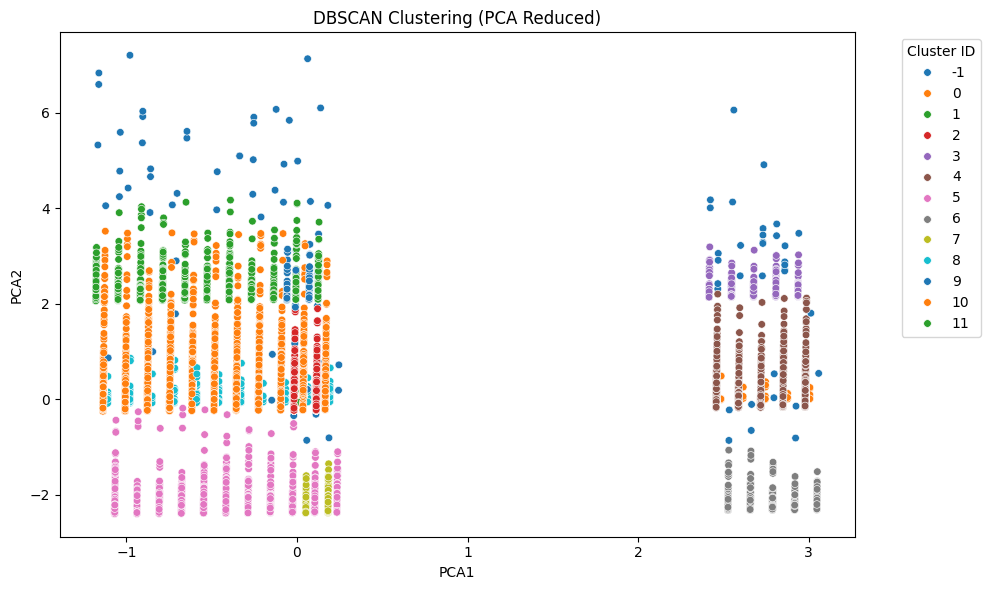

In [51]:
#Trying out a random sample
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Label', palette='tab10', legend='full', s=30)
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **FINAL SUMMARY**

In [52]:
total_records = len(df)
total_anomalies = (df['DBSCAN_Label'] == -1).sum()
normal_records = total_records - total_anomalies
anomaly_rate = (total_anomalies / total_records) * 100

print("🔍 Final DBSCAN Anomaly Detection Summary")
print("=========================================")
print(f"📄 Total Swipe Records Analyzed: {total_records}")
print(f"✅ Normal Access Records       : {normal_records}")
print(f"⚠️  Anomalous Access Detected  : {total_anomalies}")
print(f"📊 Anomaly Detection Rate      : {anomaly_rate:.2f}%")
#EXAMPLE
print("\n🔎 Sample Anomalies:")
display(df[df['DBSCAN_Label'] == -1].sample(5, random_state=42)[['Timestamp', 'UserID', 'DoorName', 'Hour', 'Result']])

🔍 Final DBSCAN Anomaly Detection Summary
📄 Total Swipe Records Analyzed: 31505
✅ Normal Access Records       : 31401
⚠️  Anomalous Access Detected  : 104
📊 Anomaly Detection Rate      : 0.33%

🔎 Sample Anomalies:


,Timestamp,UserID,DoorName,Hour,Result
9525,2025-05-10 01:00:05,U042,Main Entrance,1,Success
23075,2025-05-22 02:17:54,U033,Cafeteria,2,Success
22956,2025-05-22 02:06:01,U057,Basement Storage,2,Success
19880,2025-05-19 10:35:23,U006,HR Department,10,Failed
15399,2025-05-15 11:46:53,U082,Cafeteria,11,Failed


✅ DBSCAN Anomaly Detection Summary
Total Records Analyzed: 31505
Date Range: 2025-05-01 to 2025-05-30
Number of Detected Anomalies: 26


<ipython-input-53-2069576363>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Label', data=df, palette='Set2')


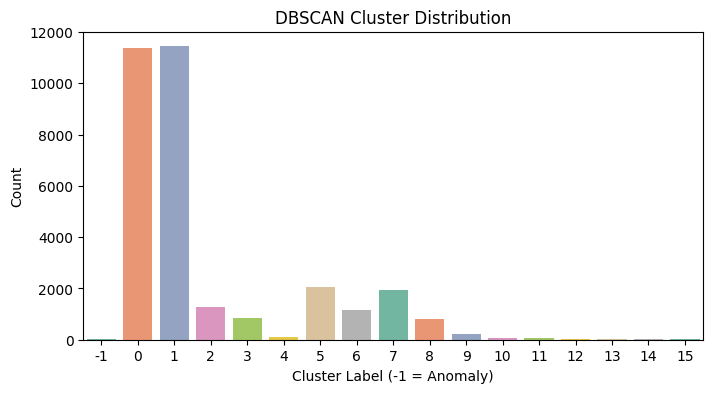

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature engineering
df['Hour'] = df['Timestamp'].dt.hour
df['DirectionCode'] = df['Direction'].map({'IN': 0, 'OUT': 1})
df['ResultCode'] = df['Result'].map({'Success': 0, 'Failed': 1})
df['DoorCode'] = df['DoorID'].astype('category').cat.codes
df['UserCode'] = df['UserID'].astype('category').cat.codes

# Select features for clustering
features = ['Hour', 'DirectionCode', 'ResultCode', 'DoorCode', 'UserCode']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN model
dbscan = DBSCAN(eps=0.7, min_samples=10)
df['DBSCAN_Label'] = dbscan.fit_predict(X_scaled)

# Extract anomalies
anomalies = df[df['DBSCAN_Label'] == -1]

# Output summary
print("✅ DBSCAN Anomaly Detection Summary")
print(f"Total Records Analyzed: {len(df)}")
print(f"Date Range: {df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}")
print(f"Number of Detected Anomalies: {len(anomalies)}")

# Optional visualization
plt.figure(figsize=(8, 4))
sns.countplot(x='DBSCAN_Label', data=df, palette='Set2')
plt.title("DBSCAN Cluster Distribution")
plt.xlabel("Cluster Label (-1 = Anomaly)")
plt.ylabel("Count")
plt.show()


✅ eps=0.30, min_samples=3, clusters=45, silhouette=0.643
✅ eps=0.30, min_samples=4, clusters=30, silhouette=0.650
✅ eps=0.30, min_samples=5, clusters=20, silhouette=0.656
✅ eps=0.30, min_samples=6, clusters=19, silhouette=0.654
✅ eps=0.30, min_samples=7, clusters=20, silhouette=0.642
✅ eps=0.30, min_samples=8, clusters=18, silhouette=0.642
✅ eps=0.30, min_samples=9, clusters=19, silhouette=0.640
✅ eps=0.30, min_samples=10, clusters=19, silhouette=0.640
✅ eps=0.40, min_samples=3, clusters=28, silhouette=0.656
✅ eps=0.40, min_samples=4, clusters=24, silhouette=0.657
✅ eps=0.40, min_samples=5, clusters=19, silhouette=0.657
✅ eps=0.40, min_samples=6, clusters=20, silhouette=0.657
✅ eps=0.40, min_samples=7, clusters=17, silhouette=0.658
✅ eps=0.40, min_samples=8, clusters=16, silhouette=0.659
✅ eps=0.40, min_samples=9, clusters=12, silhouette=0.669
✅ eps=0.40, min_samples=10, clusters=12, silhouette=0.669
✅ eps=0.50, min_samples=3, clusters=24, silhouette=0.655
✅ eps=0.50, min_samples=4, cl

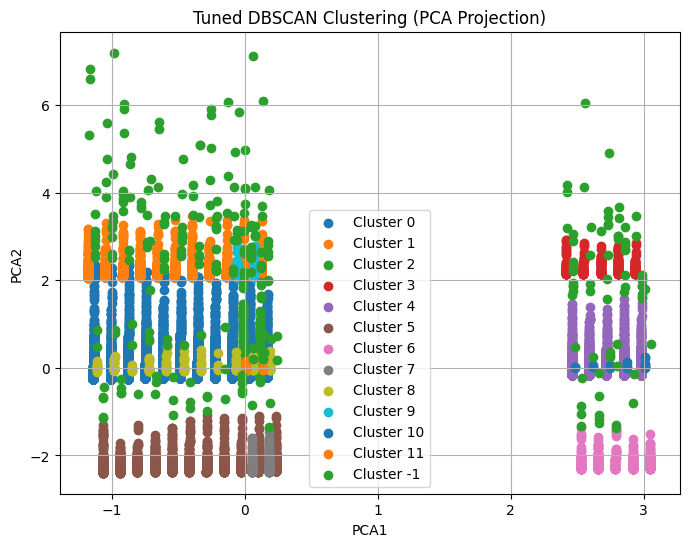

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def auto_tune_dbscan(X, eps_range=np.arange(0.3, 2.0, 0.1), min_samples_range=range(3, 11)):
    best_score = -1
    best_params = None
    best_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters >= 2:
                try:
                    score = silhouette_score(X, labels)
                    print(f"✅ eps={eps:.2f}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score:.3f}")
                    if score > best_score:
                        best_score = score
                        best_params = (eps, min_samples)
                        best_labels = labels
                except:
                    continue

    if best_params:
        print(f"\n✅ Best Params: eps={best_params[0]:.2f}, min_samples={best_params[1]} with Silhouette Score={best_score:.3f}")
        return best_labels, best_params, best_score
    else:
        print("❌ No suitable DBSCAN configuration found with at least 2 clusters.")
        return None, None, None
labels, params, score = auto_tune_dbscan(X_scaled)

# Plot only if tuning succeeded
if labels is not None:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    for lbl in set(labels):
        cluster = X_pca[np.array(labels) == lbl]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {lbl}")
    plt.title("Tuned DBSCAN Clustering (PCA Projection)")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.grid(True)
    plt.show()


🔍 PCA Explained Variance Ratio: [0.20463447 0.20095306]
✅ DBSCAN Anomaly Detection Summary
Total Records Analyzed: 31505
Date Range: 2025-05-01 to 2025-05-30
Number of Detected Anomalies: 1
Clustering Fields Used: ['Hour', 'DirectionCode', 'ResultCode', 'DoorCode', 'UserCode']


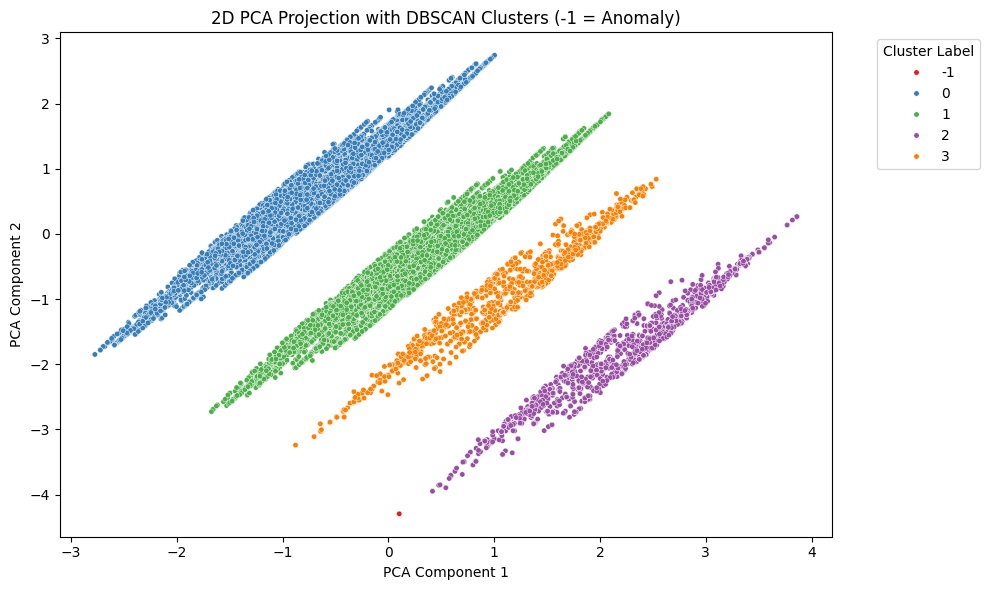

<ipython-input-54-43599106>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failed_by_door.index, y=failed_by_door.values, palette="flare")
<ipython-input-54-43599106>:60: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


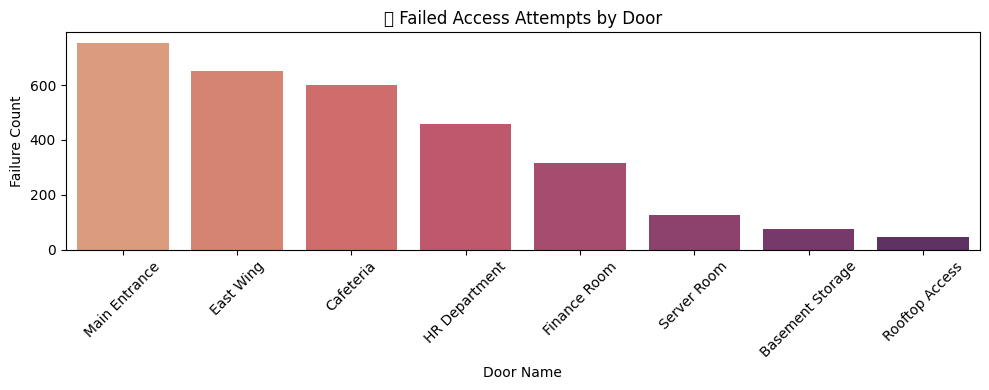

<ipython-input-54-43599106>:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


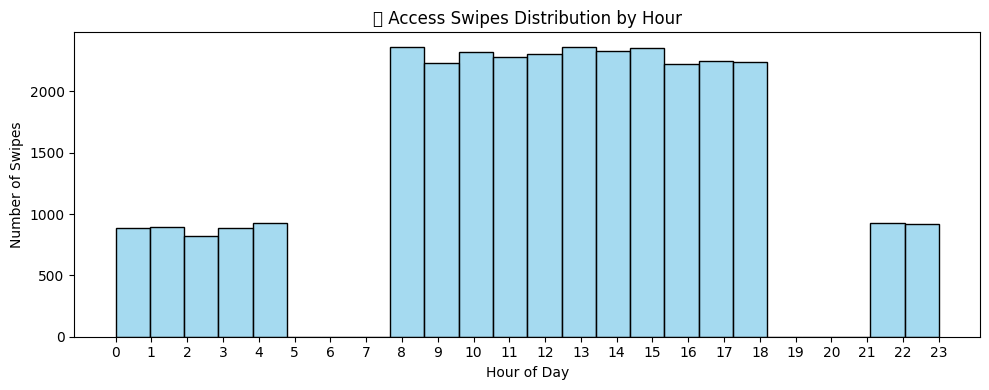

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Feature Engineering
df['Hour'] = df['Timestamp'].dt.hour
df['DirectionCode'] = df['Direction'].map({'IN': 0, 'OUT': 1})
df['ResultCode'] = df['Result'].map({'Success': 0, 'Failed': 1})
df['DoorCode'] = df['DoorID'].astype('category').cat.codes
df['UserCode'] = df['UserID'].astype('category').cat.codes

# Features used for clustering
features = ['Hour', 'DirectionCode', 'ResultCode', 'DoorCode', 'UserCode']
X = df[features]

# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("🔍 PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

# Step 4: DBSCAN Clustering
# Tuned manually: eps = 0.4 gave stable results, min_samples = 9 to define neighborhood
dbscan = DBSCAN(eps=0.4, min_samples=9)
labels = dbscan.fit_predict(X_pca)
df['DBSCAN_Label'] = labels

# Step 5: Output summary
print("✅ DBSCAN Anomaly Detection Summary")
print(f"Total Records Analyzed: {len(df)}")
print(f"Date Range: {df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}")
print(f"Number of Detected Anomalies: {sum(df['DBSCAN_Label'] == -1)}")
print("Clustering Fields Used:", features)

# Step 6: PCA Scatter Plot with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Label'], palette='Set1', s=15)
plt.title("2D PCA Projection with DBSCAN Clusters (-1 = Anomaly)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Failed Attempts by Door (Bar Chart)
plt.figure(figsize=(10, 4))
failed_by_door = df[df['Result'] == 'Failed']['DoorName'].value_counts()
sns.barplot(x=failed_by_door.index, y=failed_by_door.values, palette="flare")
plt.title("🔐 Failed Access Attempts by Door")
plt.xlabel("Door Name")
plt.ylabel("Failure Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Histogram of All Swipes by Hour
plt.figure(figsize=(10, 4))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title("⏰ Access Swipes Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Swipes")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# **DBSCAN METHOD COMPLETED**

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **K-MEANS CLUSTERING METHOD**

In [55]:
# Step 1: Select relevant numerical features
features_kmeans = df[['Hour', 'IsRestrictedDoor', 'IsOddHour', 'IsFailed']]  # adjust based on your data

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_kmeans)

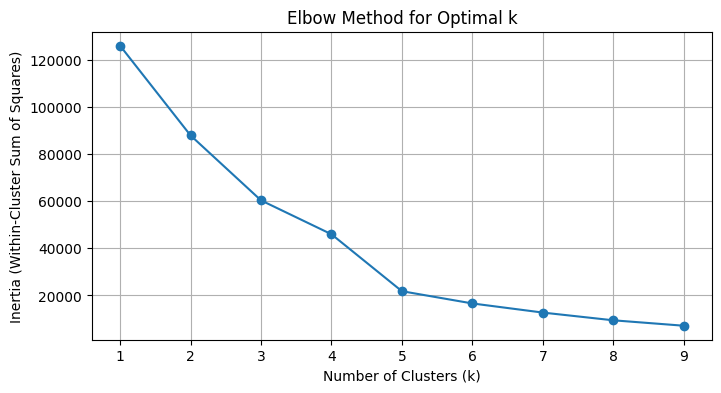

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Try different values of k
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [58]:
# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

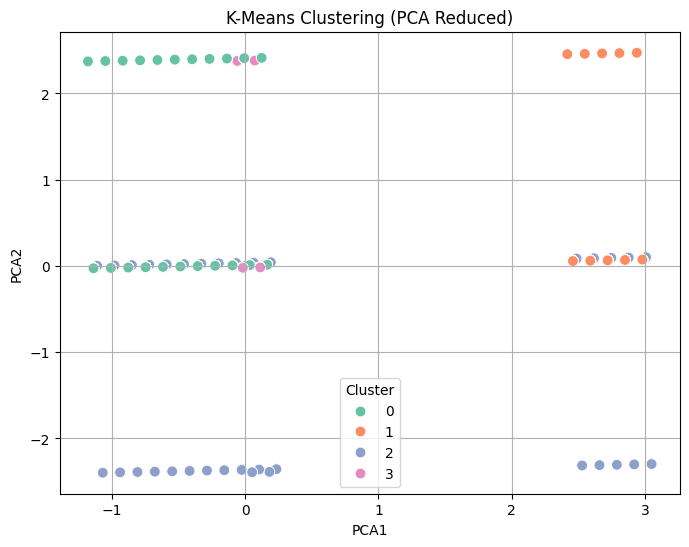

In [59]:
from sklearn.decomposition import PCA
import seaborn as sns
# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('K-Means Clustering (PCA Reduced)')
plt.grid(True)
plt.show()

In [60]:
import numpy as np

# Calculate z-scores
df['Z_Hour'] = np.abs((df['Hour'] - df['Hour'].mean()) / df['Hour'].std())
df['Z_Failed'] = np.abs((df['IsFailed'] - df['IsFailed'].mean()) / df['IsFailed'].std())

# Flag rows where z-score > 3
df['Anomaly_Z'] = ((df['Z_Hour'] > 3) | (df['Z_Failed'] > 3)).astype(int)

In [61]:
# Number of Z-score anomalies
print("Z-score based anomalies found:", df['Anomaly_Z'].sum())

# View a few of them
df[df['Anomaly_Z'] == 1].head(3)

Z-score based anomalies found: 3027


,Timestamp,UserID,DoorID,DoorName,Direction,Result,Date,Hour,DayOfWeek,DirectionCode,...,IsRestrictedDoor,IsOddHour,IsFailed,DBSCAN_Label,PCA1,PCA2,Cluster,Z_Hour,Z_Failed,Anomaly_Z
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed,2025-05-01,17,Thursday,0,...,0,0,1,2,-1.048675,2.376289,0,0.922625,3.067197,1
6,2025-05-01 01:57:08,U029,D02,East Wing,OUT,Failed,2025-05-01,1,Thursday,1,...,0,1,1,3,2.807613,2.468609,1,2.026593,3.067197,1
7,2025-05-01 14:43:07,U001,D06,Finance Room,IN,Failed,2025-05-01,14,Thursday,0,...,0,0,1,2,-0.657825,2.388676,0,0.369647,3.067197,1


In [62]:
def detect_iqr_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~df[col].between(lower_bound, upper_bound)

# Apply on selected features
df['Anomaly_IQR'] = (
    detect_iqr_outliers('Hour') |
    detect_iqr_outliers('IsFailed') |
    detect_iqr_outliers('IsRestrictedDoor')
).astype(int)

In [63]:
# Number of IQR anomalies
print("IQR based anomalies found:", df['Anomaly_IQR'].sum())

# View a few of them
df[df['Anomaly_IQR'] == 1].head(3)

IQR based anomalies found: 5889


,Timestamp,UserID,DoorID,DoorName,Direction,Result,Date,Hour,DayOfWeek,DirectionCode,...,IsOddHour,IsFailed,DBSCAN_Label,PCA1,PCA2,Cluster,Z_Hour,Z_Failed,Anomaly_Z,Anomaly_IQR
3,2025-05-01 17:21:43,U076,D02,East Wing,IN,Failed,2025-05-01,17,Thursday,0,...,0,1,2,-1.048675,2.376289,0,0.922625,3.067197,1,1
6,2025-05-01 01:57:08,U029,D02,East Wing,OUT,Failed,2025-05-01,1,Thursday,1,...,1,1,3,2.807613,2.468609,1,2.026593,3.067197,1,1
7,2025-05-01 14:43:07,U001,D06,Finance Room,IN,Failed,2025-05-01,14,Thursday,0,...,0,1,2,-0.657825,2.388676,0,0.369647,3.067197,1,1


In [64]:
def detect_iqr_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~df[col].between(lower_bound, upper_bound)

# Apply on selected features
df['Anomaly_IQR'] = (
    detect_iqr_outliers('Hour') |
    detect_iqr_outliers('IsFailed') |
    detect_iqr_outliers('IsRestrictedDoor')
).astype(int)
print("Total IQR Anomalies Detected:", df['Anomaly_IQR'].sum())

Total IQR Anomalies Detected: 5889


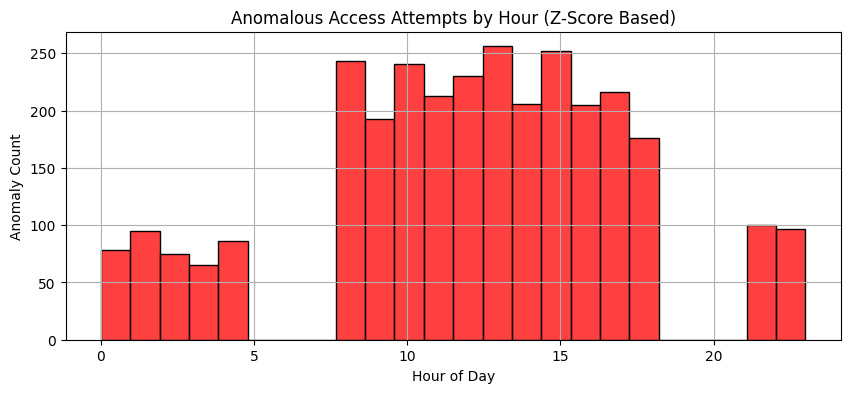

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['Anomaly_Z'] == 1], x='Hour', bins=24, kde=False, color='red')
plt.title('Anomalous Access Attempts by Hour (Z-Score Based)')
plt.xlabel('Hour of Day')
plt.ylabel('Anomaly Count')
plt.grid(True)
plt.show()

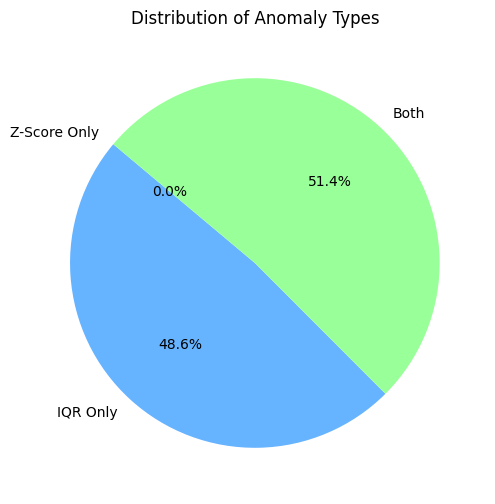

In [66]:
labels = ['Z-Score Only', 'IQR Only', 'Both']
counts = [
    ((df['Anomaly_Z'] == 1) & (df['Anomaly_IQR'] == 0)).sum(),
    ((df['Anomaly_Z'] == 0) & (df['Anomaly_IQR'] == 1)).sum(),
    ((df['Anomaly_Z'] == 1) & (df['Anomaly_IQR'] == 1)).sum()
]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Anomaly Types')
plt.show()